Company XYZ has started a new referral program on Oct, 31. Each user who refers a new user will get 10$ in credit when the new user buys something.
The program has been running for almost a month and the Growth Product Manager wants to know if it's been successful. She is very excited cause, since the referral program started, the company saw a spike in number of users and wants you to be able to give her some data she can show to her boss.
- Can you estimate the impact the program had on the site?
- Based on the data, what would you suggest to do as a next step?
- The referral program wasn't really tested in a rigorous way. It simply started on a given day for all users and you are drawing conclusions by looking at the data before and after the test started. 
    - What kinds of risks this approach presents? 
    - Can you think of a better way to test the referral program and measure its impact?

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib

%matplotlib inline

In [26]:
referral_df = pd.read_csv("referral.csv")
referral_df.head()

,user_id,date,country,money_spent,is_referral,device_id
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG
1,3,2015-10-03,CA,54,0,WUBZFTVKXGQQX
2,6,2015-10-03,FR,35,0,CBAPCJRTFNUJG
3,7,2015-10-03,UK,73,0,PRGXJZAJKMXRH
4,7,2015-10-03,MX,35,0,PRGXJZAJKMXRH


In [27]:
referral_df.shape

(97341, 6)

In [28]:
referral_df.is_referral.value_counts()

0    69324
1    28017
Name: is_referral, dtype: int64

In [29]:
referral_df.isnull().sum()

user_id        0
date           0
country        0
money_spent    0
is_referral    0
device_id      0
dtype: int64

No missing data.

In [30]:
referral_df.dtypes

user_id         int64
date           object
country        object
money_spent     int64
is_referral     int64
device_id      object
dtype: object

Need to convert date to datetime before I can really analyze. Need to determine how much data I have from before and after the program started:

In [31]:
referral_df['date'] = pd.to_datetime(referral_df['date'])

In [36]:
referral_df['date'].max()

Timestamp('2015-11-27 00:00:00')

In [37]:
referral_df['date'].min()

Timestamp('2015-10-03 00:00:00')

We have about 1 month of data from before and about 1 month of data after. 
Make a column with 0 for before the test and 1 for after the test started.

In [52]:
type(referral_df['date'].values[1])

numpy.datetime64

In [67]:
referral_df['test'] = 1
referral_df['test'][referral_df['date'] < pd.to_datetime('2015-10-31 00:00:00')] = 0
referral_df.head()

/Users/VAston/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,user_id,date,country,money_spent,is_referral,device_id,test
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG,0
1,3,2015-10-03,CA,54,0,WUBZFTVKXGQQX,0
2,6,2015-10-03,FR,35,0,CBAPCJRTFNUJG,0
3,7,2015-10-03,UK,73,0,PRGXJZAJKMXRH,0
4,7,2015-10-03,MX,35,0,PRGXJZAJKMXRH,0


Questions to answer:  
1) Did the total number of purchases increase?  
2) How much additional value was added from the referrals?   
3) If $10 was removed from each referred order, how does that impact the numbers?  

Split data into two df's, one pre-referrals bonus, one post-referrals bonus:

In [68]:
pre_df = referral_df[referral_df["test"] == 0]
post_df = referral_df[referral_df["test"] == 1]

In [178]:
def df_stats(df, group_col, analysis_column):
    df_new = pd.DataFrame(index = df[group_col].unique(), columns=['count', 'total', 'average'])
    for data in df[group_col].unique():
        df_new_t = pd.DataFrame(columns=['count', 'total', 'average'])
        df_new_t['group'] = data
        df_new_t['count'] = post_df[analysis_column][post_df[group_col] == data].count()
        df_new_t['total'] = post_df[analysis_column][post_df[group_col] == data].sum()
        df_new_t['average'] = post_df[analysis_column][post_df[group_col] == data].mean()
        print(df_new_t)
        df_new.append(df_new_t)
    
    return df_new

In [179]:
post_df.is_referral.unique()

array([0, 1])

In [180]:
check_df = df_stats(post_df, "is_referral", "money_spent")
check_df

Empty DataFrame
Columns: [count, total, average, group]
Index: []
Empty DataFrame
Columns: [count, total, average, group]
Index: []


,count,total,average
0,NaN,NaN,NaN
1,NaN,NaN,NaN


In [95]:
post_df["is_referral"].value_counts()

1    28017
0    21983
Name: is_referral, dtype: int64

In [120]:
post_df["money_spent"][post_df["is_referral"] == 0].sum()
post_df["money_spent"][post_df["is_referral"] == 0].sum()

1028216

In [150]:
post_df["money_spent"][post_df["is_referral"] == 0].mean()

46.773233862530134

In [121]:
post_df["money_spent"][post_df["is_referral"] == 1].sum()

1315787

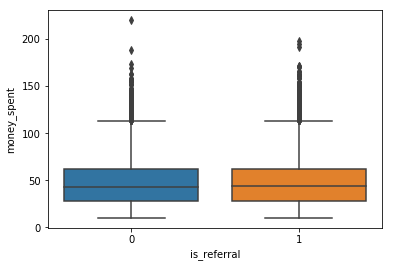

In [85]:
sns.boxplot(y='money_spent', x="is_referral", data=post_df)

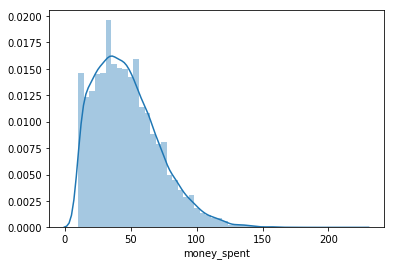

In [90]:
sns.distplot(post_df['money_spent'][post_df['is_referral'] == 0], kde='True')

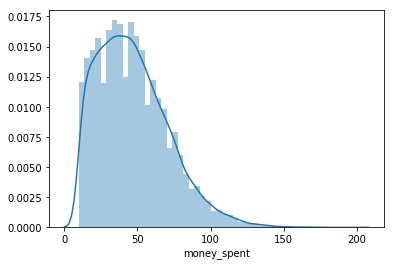

In [91]:
sns.distplot(post_df['money_spent'][post_df['is_referral'] == 1], kde='True')

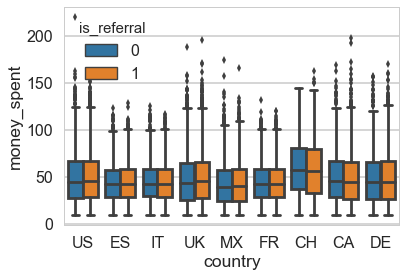

In [93]:
sns.set_context("poster")
sns.set_style("whitegrid")

ax = sns.boxplot(y="money_spent", x="country", data=post_df, hue = "is_referral")

In [118]:
post_df["test"].groupby([post_df['is_referral'],post_df['country']]).count()

is_referral  country
0            CA         1974
             CH          199
             DE         2015
             ES         2384
             FR         3812
             IT         2800
             MX         2053
             UK         3505
             US         3241
1            CA         2506
             CH          279
             DE         2578
             ES         3062
             FR         4748
             IT         3582
             MX         2539
             UK         4588
             US         4135
Name: test, dtype: int64

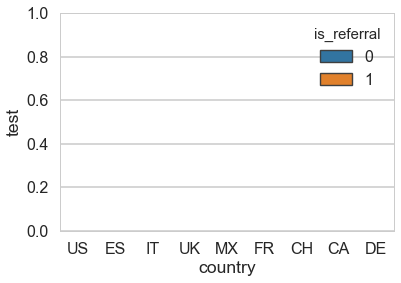

In [106]:
sns.set_context("poster")
sns.set_style("whitegrid")

ax = sns.boxplot(y=post_df["test"].groupby(post_df['country']).count(), x="country", data=post_df, hue = 'is_referral')

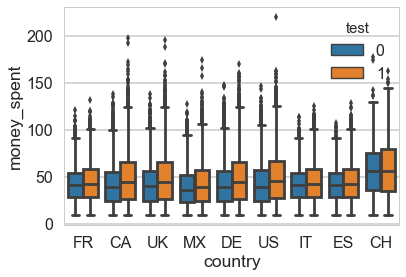

In [94]:
referral_df
sns.set_context("poster")
sns.set_style("whitegrid")

ax = sns.boxplot(y="money_spent", x="country", data=referral_df, hue = "test")

Check the distribution of referrals and non-referrals:

In [16]:
referral_df[referral_df.is_referral == 0].describe()

,user_id,money_spent,is_referral
count,69324.000000,69324.000000,69324.0
mean,3858.158444,43.774335,0.0
std,4020.875381,22.044045,0.0
min,1.000000,10.000000,0.0
25%,1445.000000,27.000000,0.0
50%,2884.000000,41.000000,0.0
75%,4326.000000,57.000000,0.0
max,19999.000000,220.000000,0.0


In [17]:
referral_df[referral_df.is_referral == 1].describe()

,user_id,money_spent,is_referral
count,28017.000000,28017.000000,28017.0
mean,12532.380733,46.963879,1.0
std,4315.034632,24.396786,0.0
min,5001.000000,10.000000,1.0
25%,8802.000000,28.000000,1.0
50%,12560.000000,44.000000,1.0
75%,16240.000000,62.000000,1.0
max,20000.000000,198.000000,1.0


About 30% of the data is from referrals. 

